## Importing modules

In [ ]:
!pip install datasets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 547.8/547.8 kB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 316.1/316.1 kB 14.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 39.9/39.9 MB 9.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.9/64.9 kB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 7.2 MB/s eta 0:00:00
  Attempting uninstall: requests
    Found existing installation: requests 2.31.0
    Uninstalling requests-2.31.0:
      Successfully uninstalled requests-2.31.0
  Attempting uninstall: pyarrow
    Found existing installation: pyarrow 14.0.2
    Uninstalling pyarrow-14.0.2:
      Successfully uninstalled pyarrow-14.0.2
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2024.6.1
    Uninstalling fsspec-2024.6.1:
      S

In [ ]:
!pip install tensorflow

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import datasets
from sklearn.model_selection import train_test_split

import nltk
import string
import warnings
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from wordcloud import WordCloud

import tensorflow as tf
from tensorflow import keras
from keras import layers
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

nltk.download('stopwords')
nltk.download('omw-1.4')
nltk.download('wordnet')
warnings.filterwarnings('ignore')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [ ]:
print(tf.__version__)

2.17.0


In [ ]:
!python -m pip install --upgrade pip

  Using cached pip-24.2-py3-none-any.whl.metadata (3.6 kB)
Using cached pip-24.2-py3-none-any.whl (1.8 MB)
  Attempting uninstall: pip
    Found existing installation: pip 24.1.2
    Uninstalling pip-24.1.2:
      Successfully uninstalled pip-24.1.2


In [ ]:
!pip list

Package                   Version
------------------------- --------------
aiohttp                   3.9.5
aiosignal                 1.3.1
anyio                     4.4.0
argon2-cffi               23.1.0
argon2-cffi-bindings      21.2.0
arrow                     1.3.0
asttokens                 2.4.1
async-lru                 2.0.4
attrs                     23.2.0
Babel                     2.15.0
beautifulsoup4            4.12.3
bleach                    6.1.0
certifi                   2024.7.4
cffi                      1.16.0
charset-normalizer        3.3.2
click                     8.1.7
colorama                  0.4.6
comm                      0.2.2
contourpy                 1.2.1
cycler                    0.12.1
datasets                  2.20.0
debugpy                   1.8.2
decorator                 5.1.1
defusedxml                0.7.1
dill                      0.3.8
executing                 2.0.1
fastjsonschema            2.20.0
filelock                  3.15.4
fonttools       

#Import Dataset

In [ ]:
dataset = datasets.load_dataset('ucberkeley-dlab/measuring-hate-speech', 'default')
df = dataset['train'].to_pandas()
df.describe()

Generating train split:   0%|          | 0/135556 [00:00<?, ? examples/s]

,comment_id,annotator_id,platform,sentiment,respect,insult,humiliate,status,dehumanize,violence,...,hatespeech,hate_speech_score,infitms,outfitms,annotator_severity,std_err,annotator_infitms,annotator_outfitms,hypothesis,annotator_age
count,135556.000000,135556.000000,135556.000000,135556.000000,135556.000000,135556.00000,135556.000000,135556.000000,135556.000000,135556.000000,...,135556.000000,135556.000000,135556.000000,135556.000000,135556.000000,135556.000000,135556.000000,135556.000000,135556.000000,135451.000000
mean,23530.416138,5567.097812,1.281352,2.954307,2.828875,2.56331,2.278638,2.698575,1.846211,1.052045,...,0.744733,-0.567428,1.034322,1.001052,-0.018817,0.300588,1.007158,1.011841,0.014589,37.910772
std,12387.194125,3230.508937,1.023542,1.231552,1.309548,1.38983,1.370876,0.898500,1.402372,1.345706,...,0.932260,2.380003,0.496867,0.791943,0.487261,0.236380,0.269876,0.675863,0.613006,11.641276
min,1.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,0.000000,-8.340000,0.100000,0.070000,-1.820000,0.020000,0.390000,0.280000,-1.578693,18.000000
25%,18148.000000,2719.000000,0.000000,2.000000,2.000000,2.00000,1.000000,2.000000,1.000000,0.000000,...,0.000000,-2.330000,0.710000,0.560000,-0.380000,0.030000,0.810000,0.670000,-0.341008,29.000000
50%,20052.000000,5602.500000,1.000000,3.000000,3.000000,3.00000,3.000000,3.000000,2.000000,0.000000,...,0.000000,-0.340000,0.960000,0.830000,-0.020000,0.340000,0.970000,0.850000,0.110405,35.000000
75%,32038.250000,8363.000000,2.000000,4.000000,4.000000,4.00000,3.000000,3.000000,3.000000,2.000000,...,2.000000,1.410000,1.300000,1.220000,0.350000,0.420000,1.170000,1.130000,0.449555,45.000000
max,50070.000000,11142.000000,3.000000,4.000000,4.000000,4.00000,4.000000,4.000000,4.000000,4.000000,...,2.000000,6.300000,5.900000,9.000000,1.360000,1.900000,2.010000,9.000000,0.987511,81.000000


In [ ]:
df.head()

,comment_id,annotator_id,platform,sentiment,respect,insult,humiliate,status,dehumanize,violence,...,annotator_religion_hindu,annotator_religion_jewish,annotator_religion_mormon,annotator_religion_muslim,annotator_religion_nothing,annotator_religion_other,annotator_sexuality_bisexual,annotator_sexuality_gay,annotator_sexuality_straight,annotator_sexuality_other
0,47777,10873,3,0.0,0.0,0.0,0.0,2.0,0.0,0.0,...,False,False,False,False,False,False,False,False,True,False
1,39773,2790,2,0.0,0.0,0.0,0.0,2.0,0.0,0.0,...,False,False,False,False,False,False,False,False,True,False
2,47101,3379,3,4.0,4.0,4.0,4.0,4.0,4.0,0.0,...,False,False,False,False,True,False,False,False,True,False
3,43625,7365,3,2.0,3.0,2.0,1.0,2.0,0.0,0.0,...,False,False,False,False,False,False,False,False,True,False
4,12538,488,0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,...,False,False,False,False,False,False,False,False,True,False


In [ ]:
df.columns

Index(['comment_id', 'annotator_id', 'platform', 'sentiment', 'respect',
       'insult', 'humiliate', 'status', 'dehumanize', 'violence',
       ...
       'annotator_religion_hindu', 'annotator_religion_jewish',
       'annotator_religion_mormon', 'annotator_religion_muslim',
       'annotator_religion_nothing', 'annotator_religion_other',
       'annotator_sexuality_bisexual', 'annotator_sexuality_gay',
       'annotator_sexuality_straight', 'annotator_sexuality_other'],
      dtype='object', length=131)

In [ ]:
req = ["hate_speech_score" , "text"]

df.drop(columns = [col for col in df.columns if col not in req] , inplace = True)


In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 135556 entries, 0 to 135555
Data columns (total 2 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   hate_speech_score  135556 non-null  float64
 1   text               135556 non-null  object 
dtypes: float64(1), object(1)
memory usage: 2.1+ MB


In [ ]:
hate = (df['hate_speech_score'] > 0.5).sum()
not_hate = (df['hate_speech_score'] < -1).sum()
neutral = len(df) - hate - not_hate

print(hate , not_hate , neutral)


49048 53651 32857


In [ ]:
df = df[~((df['hate_speech_score'] >= -1) & (df['hate_speech_score'] <= 0.5))]

In [ ]:
hate = (df['hate_speech_score'] > 0.5).sum()
not_hate = (df['hate_speech_score'] < -1).sum()
neutral = len(df) - hate - not_hate

print(hate , not_hate , neutral)

49048 53651 0


In [ ]:
df.head()

,hate_speech_score,text
0,-3.90,Yes indeed. She sort of reminds me of the elde...
1,-6.52,The trans women reading this tweet right now i...
4,1.54,For starters bend over the one in pink and kic...
5,-4.93,Sounds like the kinda wholsesome life I'd die ...
7,2.08,Fuck off you insufferable retarded faggot.


In [ ]:
df['hate_speech_score'] = df['hate_speech_score'].apply(lambda x: 0.0 if x < -1.0 else 1.0)

In [ ]:
df.head()

,hate_speech_score,text
0,0.0,Yes indeed. She sort of reminds me of the elde...
1,0.0,The trans women reading this tweet right now i...
4,1.0,For starters bend over the one in pink and kic...
5,0.0,Sounds like the kinda wholsesome life I'd die ...
7,1.0,Fuck off you insufferable retarded faggot.


#Text Preprocessing

In [ ]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
from nltk.tokenize import word_tokenize

lemmatizer = WordNetLemmatizer()

vocab = set()

stop_words = set(stopwords.words('english'))

def preprocess_text(text):

    tokens = word_tokenize(text)

    tokens = [word for word in tokens if word.lower() not in stop_words and word not in string.punctuation]

    tokens = [lemmatizer.lemmatize(word.lower()) for word in tokens]

    vocab.update(tokens)

    preprocessed_text = ' '.join(tokens)

    return preprocessed_text


In [ ]:
df['preprocessed_text'] = df['text'].apply(preprocess_text)

In [ ]:
tokenizer = Tokenizer(filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n”“’')

tokenizer.fit_on_texts(df['preprocessed_text'])

X = tokenizer.texts_to_sequences(df['preprocessed_text'])

max_len = max(len(y) for y in X)

X = pad_sequences(X, maxlen=max_len)

In [ ]:
max_len

73

In [ ]:
max_words = len(tokenizer.word_index)
max_words

36504

In [ ]:
from keras.utils import to_categorical
y = to_categorical(df['hate_speech_score'])

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

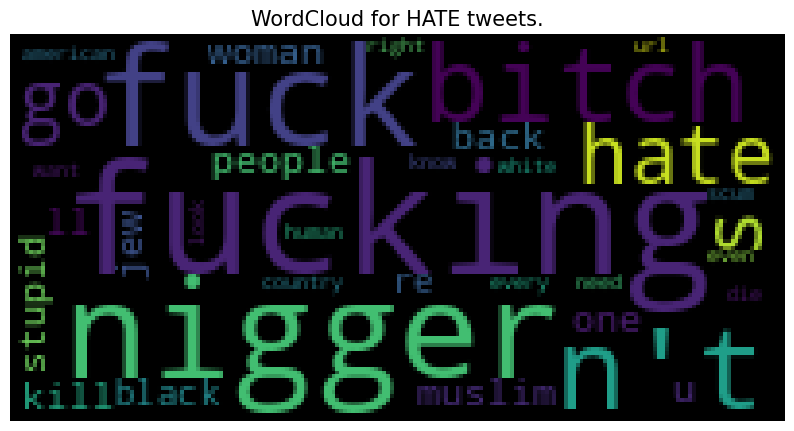

In [ ]:
def plot_word_cloud(data, typ):
  tweet_corpus = " ".join(data['preprocessed_text'])

  plt.figure(figsize = (10,10))

  wc = WordCloud(max_words = 100,
                width = 200,
                height = 100,
                collocations = False).generate(tweet_corpus)

  plt.title(f'WordCloud for {typ} tweets.', fontsize = 15)
  plt.axis('off')
  plt.imshow(wc)
  plt.show()
  print()

plot_word_cloud(df[df['hate_speech_score']>0.5], typ='HATE')

In [ ]:
X_train.shape, X_val.shape, y_train.shape, y_val.shape

((82159, 73), (20540, 73), (82159, 2), (20540, 2))

In [ ]:
print(np.max(X_train))
print(np.max(X_val))

X_train = np.clip(X_train, 0, 36503)
X_val = np.clip(X_val, 0, 36503)

36484
36504


In [ ]:
print(np.max(X_train))
print(np.max(X_val))

36484
36503


In [ ]:
embedding_dim = 512

#Model Development

In [ ]:
from keras import layers, regularizers
from keras.callbacks import EarlyStopping
import keras

model = keras.models.Sequential([
    layers.Embedding(input_dim=max_words, output_dim=embedding_dim, input_length=max_len, trainable=True),
    layers.Bidirectional(layers.LSTM(128, dropout=0.2, recurrent_dropout=0.2, return_sequences=True)),
    layers.Bidirectional(layers.LSTM(128, dropout=0.2, recurrent_dropout=0.2)),
    layers.Dense(512, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    layers.Dropout(0.2),
    layers.Dense(2, activation='softmax')
])

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional (Bidirectional)        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_1 (Bidirectional)      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [ ]:
keras.utils.plot_model(
    model,
    show_shapes=True,
    show_dtype=True,
    show_layer_activations=True
)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [ ]:
history = model.fit(X_train, y_train,
                    validation_data=(X_val, y_val),
                    epochs=2,
                    verbose=1,
                    batch_size=32
                    )

Epoch 1/2
2568/2568 ━━━━━━━━━━━━━━━━━━━━ 3335s 1s/step - accuracy: 0.8879 - loss: 0.4458 - val_accuracy: 0.9519 - val_loss: 0.1361
Epoch 2/2
2568/2568 ━━━━━━━━━━━━━━━━━━━━ 3130s 1s/step - accuracy: 0.9701 - loss: 0.0860 - val_accuracy: 0.9627 - val_loss: 0.1177


In [ ]:
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
tokenizer_path = '/content/drive/MyDrive/ipd/model/english_text_tokenizer.pkl'
model_path = '/content/drive/MyDrive/ipd/model/english_text_model.h5'

In [ ]:
import pickle
with open(tokenizer_path, 'wb') as file:
    pickle.dump(tokenizer, file)

In [ ]:
model.save(model_path)

#Model Evaluation

In [ ]:
val_loss, val_accuracy = model.evaluate(X_val, y_val, verbose=1)
print(f'Validation Loss: {val_loss}')
print(f'Validation Accuracy: {val_accuracy}')

642/642 ━━━━━━━━━━━━━━━━━━━━ 143s 222ms/step - accuracy: 0.9617 - loss: 0.1185
Validation Loss: 0.11774062365293503
Validation Accuracy: 0.9627069234848022


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

y_val_pred = model.predict(X_val)
y_val_pred_classes = np.argmax(y_val_pred, axis=1)
y_val_true = np.argmax(y_val, axis=1)

642/642 ━━━━━━━━━━━━━━━━━━━━ 143s 221ms/step


In [ ]:
print(classification_report(y_val_true, y_val_pred_classes, target_names=['Not Hate', 'Hate']))

              precision    recall  f1-score   support

    Not Hate       0.97      0.95      0.96     10761
        Hate       0.95      0.97      0.96      9779

    accuracy                           0.96     20540
   macro avg       0.96      0.96      0.96     20540
weighted avg       0.96      0.96      0.96     20540



In [ ]:
conf_matrix = confusion_matrix(y_val_true, y_val_pred_classes)
print(conf_matrix)

[[10275   486]
 [  280  9499]]


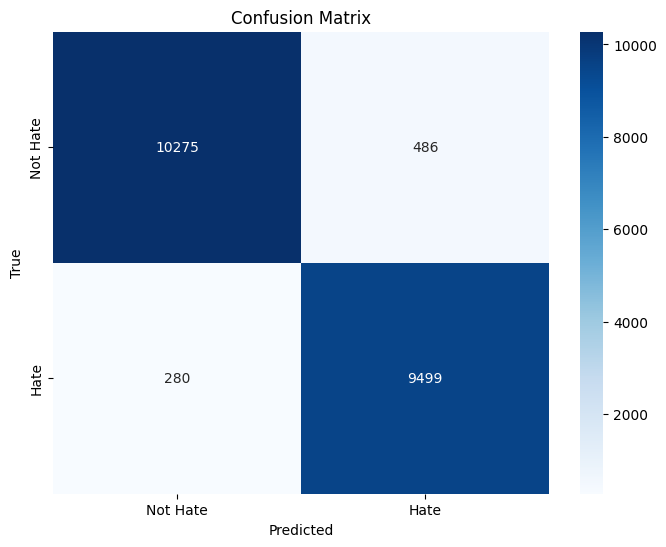

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Hate', 'Hate'], yticklabels=['Not Hate', 'Hate'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

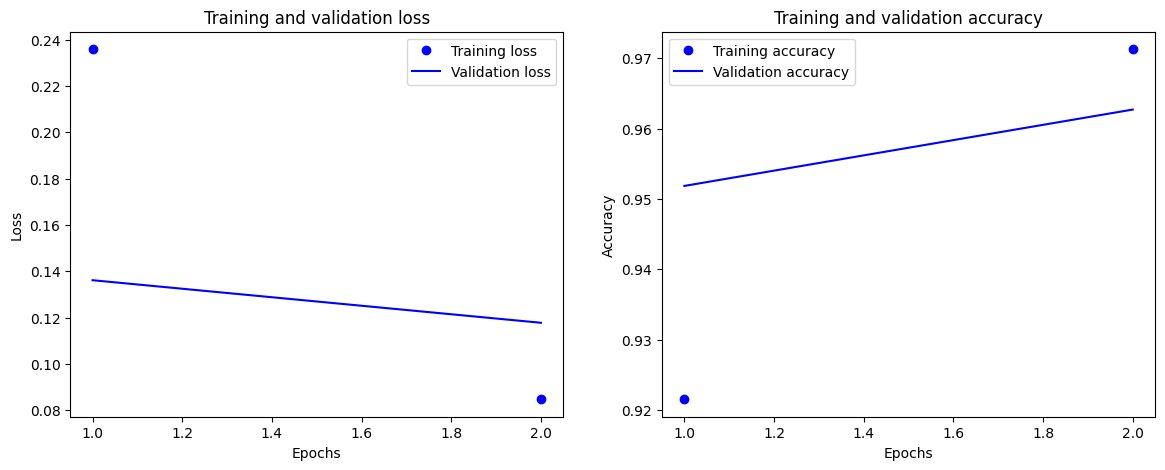

In [ ]:
history_dict = history.history

loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
accuracy_values = history_dict['accuracy']
val_accuracy_values = history_dict['val_accuracy']

epochs = range(1, len(loss_values) + 1)

plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epochs, accuracy_values, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy_values, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

#Saving and Using Model

In [ ]:
import joblib
joblib.dump((tokenizer, model), 'lstm_model.pkl')
print('The model is saved to model.pkl')

The model is saved to model.pkl


In [ ]:
from tensorflow.keras.models import load_model
import pickle
import pandas as pd

# Load the model
model2 = load_model(model_path)

# Load the tokenizer
with open(tokenizer_path, 'rb') as file:
    tokenizer2 = pickle.load(file)

In [ ]:
from nltk.tokenize import word_tokenize

def preprocess(text):
    lemmatizer = WordNetLemmatizer()
    vocab = set()
    stop_words = set(stopwords.words('english'))
    tokens = word_tokenize(text)
    tokens = [word for word in tokens if word.lower() not in stop_words and word not in string.punctuation]
    tokens = [lemmatizer.lemmatize(word.lower()) for word in tokens]
    vocab.update(tokens)
    preprocessed_text = ' '.join(tokens)
    X = tokenizer2.texts_to_sequences(preprocessed_text)
    max_len = max(len(y) for y in X)
    X = pad_sequences(X, maxlen=max_len)
    return X

In [ ]:
pred = model2.predict(preprocess("hello"))
average_probabilities = np.mean(pred, axis=0)
print("Average Probabilities:", average_probabilities)

final_class = np.argmax(average_probabilities)
print("Final Class:", final_class)

if final_class == 0:
    print("The string is classified as hate speech.")
else:
    print("The string is classified as normal speech.")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
Average Probabilities: [0.7727629  0.22723708]
Final Class: 0
The string is classified as hate speech.
